# LEGOS snow inversion using interpolated CS2 & AK freeboards
data available: aug - may, 2017-2018 - 2020-2021

### ask michel --- getting mostly negative snow depth??

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.basemap import Basemap
from scipy import stats
import matplotlib as mpl
import pickle
import datetime
import glob
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings("ignore")

# CS2

In [34]:
datapath = '/Users/carmennab/PhD/OI_PolarSnow/test/'
f = open(datapath+'CS2_SAR_dailyFB_50km_2019-2020_season.pkl','rb')
CS2_SAR = pickle.load(f)
f = open(datapath+'CS2_SARIN_dailyFB_50km_2019-2020_season.pkl','rb')
CS2_SARIN = pickle.load(f)

In [35]:
a = np.load(datapath+'CS2_FB_interp_2017-2018_50km_20171222.npy')

In [27]:
a = CS2_SAR['20200115']
b = CS2_SARIN['20200115']

In [28]:
obs = []
for key in CS2_SAR:
    if key in CS2_SARIN:
          obs.append([CS2_SAR[key],CS2_SARIN[key]])

In [29]:
a = obs[50]

In [40]:
for key in CS2_SARIN:
    print(key, np.nanmean(CS2_SARIN[key]))

20170801 nan
20170802 nan
20170803 nan
20170804 nan
20170805 nan
20170806 nan
20170807 nan
20170808 nan
20170809 nan
20170810 nan
20170811 nan
20170812 nan
20170813 nan
20170814 nan
20170815 nan
20170816 nan
20170817 nan
20170818 nan
20170819 nan
20170820 nan
20170821 nan
20170822 nan
20170823 nan
20170824 nan
20170825 nan
20170826 nan
20170827 nan
20170828 nan
20170829 nan
20170830 nan
20170831 nan
20170901 nan
20170902 nan
20170903 nan
20170904 nan
20170905 nan
20170906 nan
20170907 nan
20170908 nan
20170909 nan
20170910 nan
20170911 nan
20170912 nan
20170913 nan
20170914 nan
20170915 nan
20170916 nan
20170917 nan
20170918 nan
20170919 nan
20170920 nan
20170921 nan
20170922 nan
20170923 nan
20170924 nan
20170925 nan
20170926 nan
20170927 nan
20170928 nan
20170929 nan
20170930 nan
20171001 nan
20171002 nan
20171003 nan
20171004 nan
20171005 nan
20171006 nan
20171007 nan
20171008 nan
20171009 nan
20171010 nan
20171011 nan
20171012 nan
20171013 nan
20171014 nan
20171015 nan
20171016 nan

In [37]:
a = CS2_SARIN['20171028']

In [43]:
a = np.load(datapath+'CS2_FB_interp_2017-2018_50km_20181220.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/carmennab/PhD/OI_PolarSnow/test/CS2_FB_interp_2017-2018_50km_20181220.npy'

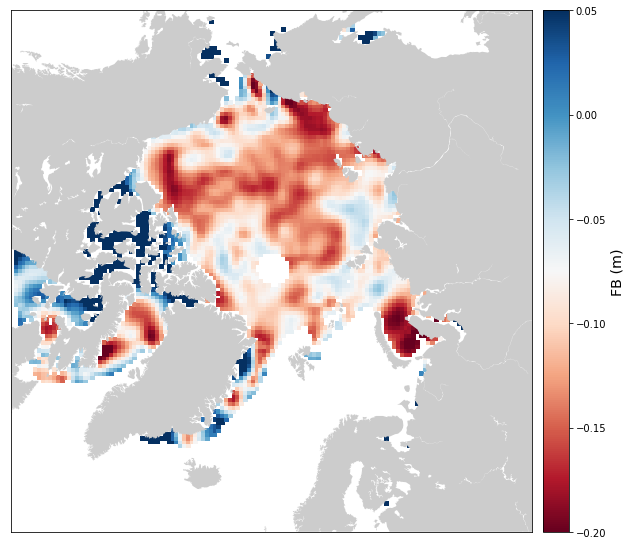

In [36]:
x_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/x_50km.npy') # load Will's grid, 161 x 161 array
y_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/y_50km.npy')
fig,ax = plt.subplots(1,figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='l',round=False)
m.fillcontinents(color=(0.8, 0.8, 0.8))
p_map = m.pcolormesh(x_WG,y_WG,a,cmap='RdBu',vmin=-0.2,vmax=0.05)
a = m.colorbar(p_map) 
a.set_label('FB (m)',fontsize='x-large')

In [2]:
import tqdm
days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/LEGOS/'
all_Ku = np.full((4018,160,160), np.nan)
for day in tqdm.tqdm(days):
    date = dates[day].strftime('%Y%m%d')
    for f in os.listdir(datapath):
        if 'CS2_FB_interp' in f:
            if date in f:
                all_Ku[day] = np.load(datapath+str(f))
            else: 
                pass

100%|██████████████████████████████████████| 4018/4018 [00:15<00:00, 266.97it/s]


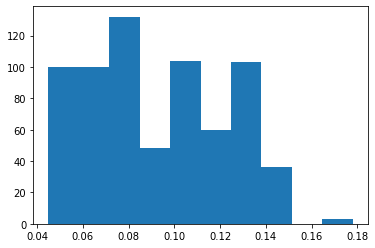

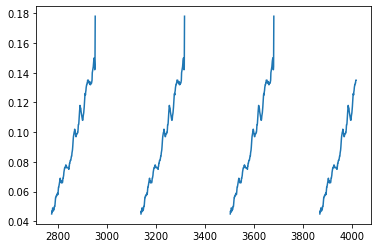

In [3]:
mean = np.full(4018,np.nan)
for day in days:
    m = np.nanmean(all_Ku[day])
    mean[day] = m
plt.hist(mean)
plt.show()
plt.plot(mean)
plt.show()

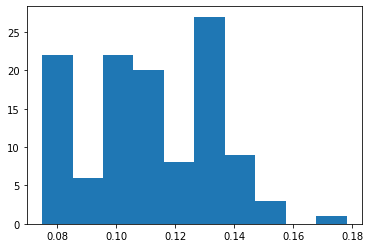

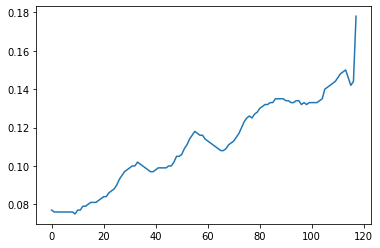

In [4]:
# 2018 - 2019 only
new_mean = mean[3199:3377] 
plt.hist(new_mean)
plt.show()
plt.plot(new_mean)
plt.show()

# AK

In [5]:
import tqdm
days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/LEGOS/'
all_Ka = np.full((4018,160,160), np.nan)
for day in tqdm.tqdm(days):
    date = dates[day].strftime('%Y%m%d')
    for f in os.listdir(datapath):
        if 'AK_FB_interp' in f:
            if date in f:
                all_Ka[day] = np.load(datapath+str(f))
            else: 
                pass

100%|██████████████████████████████████████| 4018/4018 [00:15<00:00, 267.00it/s]


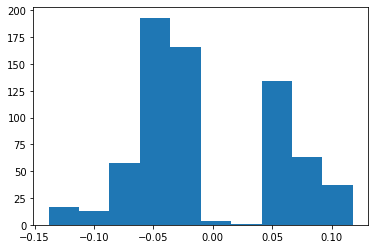

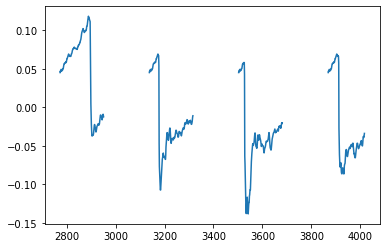

In [6]:
mean = np.full(4018,np.nan)
for day in days:
    m = np.nanmean(all_Ka[day])
    mean[day] = m
plt.hist(mean)
plt.show()
plt.plot(mean)
plt.show()

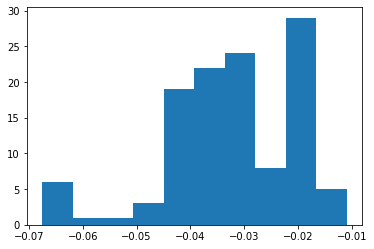

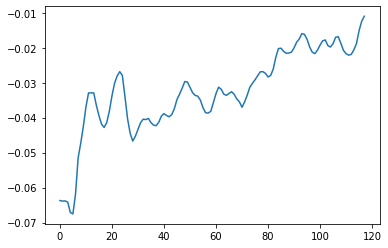

In [7]:
# 2018 - 2019 only
new_mean = mean[3199:3377] 
plt.hist(new_mean)
plt.show()
plt.plot(new_mean)
plt.show()

### apply snow inversion equation provided by Sara Fleury

SD = (FB_ka - FB_ku) * 0.8077

In [13]:
SD = np.full((4018,160,160),np.nan)
for day in tqdm.tqdm(days):
    Ku = all_Ku[day]
    Ka = all_Ka[day]
    SD[day] = (Ka - Ku) * 0.8077

100%|████████████████████████████████████| 4018/4018 [00:00<00:00, 23574.58it/s]


(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0., 11., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-0.27131957, -0.2371244 , -0.20292922, -0.16873405, -0.13453887,
        -0.1003437 , -0.06614853, -0.03195335,  0.00224182,  0.036437  ,
         0.07063217]),
 <a list of 160 Lists of Patches objects>)

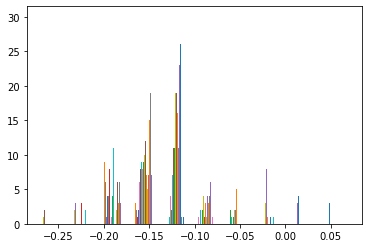

In [17]:
plt.hist(SD[4000])

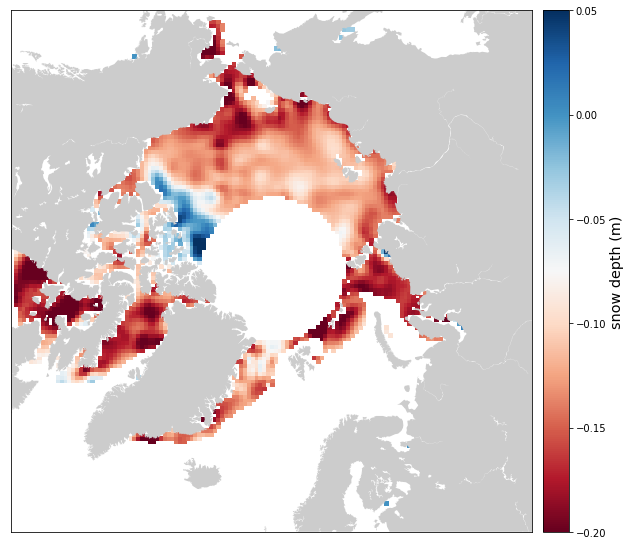

In [21]:
# plot an example day to check everything works
x_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/x_50km.npy') # load Will's grid, 161 x 161 array
y_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/y_50km.npy')
fig,ax = plt.subplots(1,figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='l',round=False)
m.fillcontinents(color=(0.8, 0.8, 0.8))
p_map = m.pcolormesh(x_WG,y_WG,SD[4000],cmap='RdBu',vmin=-0.2,vmax=0.05)
a = m.colorbar(p_map) 
a.set_label('snow depth (m)',fontsize='x-large')

#### daily mean snow depth

100%|████████████████████████████████████| 4018/4018 [00:00<00:00, 12062.99it/s]


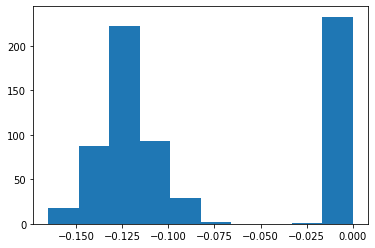

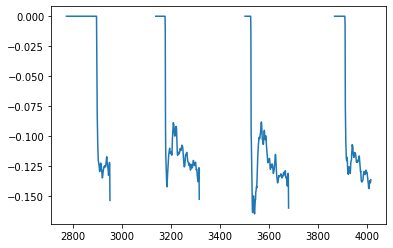

In [18]:
mean = np.full(4018,np.nan)
for day in tqdm.tqdm(days):
    mean[day] = np.nanmean(SD[day])
plt.hist(mean)
plt.show()
plt.plot(mean)
plt.show()